In [3]:
from google.colab import files
files.upload()

Saving Sales.csv to Sales (1).csv


{'Sales (1).csv': b'TV,Radio,Newspaper,Sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,12\r\n151.5,41.3,58.5,16.5\r\n180.8,10.8,58.4,17.9\r\n8.7,48.9,75,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1,4.8\r\n199.8,2.6,21.2,15.6\r\n66.1,5.8,24.2,12.6\r\n214.7,24,4,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,13.7\r\n204.1,32.9,46,19\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18\r\n237.4,5.1,23.5,17.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,20.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,17\r\n142.9,29.3,12.6,15\r\n240.1,16.7,22.9,20.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30,13.2\r\n265.6,20,0.3,17.4\r\n95.7,1.4,7.4,11.9\r\n290.7,4.1,8.5,17.8\r\n266.9,43.8,5,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228,37.7,32,21.5\r\n202.5,22.3,31.6,16.6\r\n177,33.4,38.7,17.1\r\n293.6,27.7,1.8,20.7

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
#Load the Dataset
data = pd.read_csv('Sales.csv')

In [6]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [7]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [8]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
# Calculate metrics to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 1.7052146229349223
Mean Absolute Error (MAE): 1.2748262109549338
R-squared (R2): 0.9059011844150826


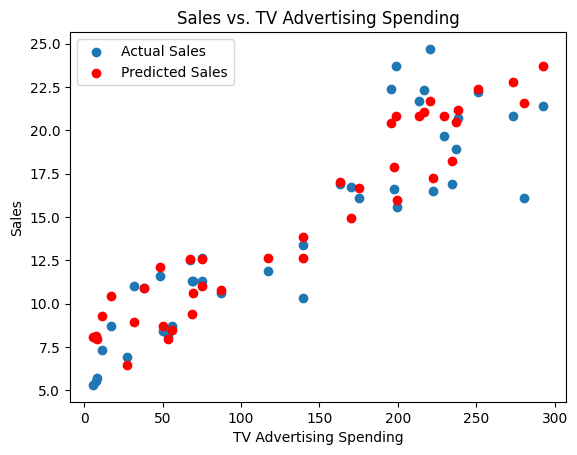

In [13]:
# Visualize the predictions
plt.scatter(X_test['TV'], y_test, label='Actual Sales')
plt.scatter(X_test['TV'], y_pred, label='Predicted Sales', color='red')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales vs. TV Advertising Spending')
plt.show()